In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
f = open("List test.rtf")
lines = f.readlines()

In [11]:
indices = []
for idx, line in enumerate(lines):
    if "github" in line:
        line = line.strip().replace("\f0\fs24 \cf0", "")
        print(line)
        indices.append(idx)

\f0\fs24 \cf0 https://github.com/weiji14/deepicedrain\
https://github.com/ipno-llead/processing\
https://github.com/nasaharvest/crop-mask\
https://github.com/BlueBrain/Search\
https://github.com/rootski-io/rootski\
https://github.com/dna-seq/dna-seq\
https://github.com/GenericMappingTools/pygmt\
https://github.com/GenericMappingTools/gmt\


In [12]:
np.array(indices) 

array([  7,  21,  35,  49,  63,  77,  91, 105])

In [13]:
githubs = {}
for idx in indices:
    githubs[lines[idx]] = {}
    for i in range(idx , idx + (14)):
        line = lines[i]
        

        if "dvc" in line:
            title = (line.strip().split("[")[0])
            data = eval("[" + line.strip().replace("\\", "").split("[")[-1])
            githubs[lines[idx]][title] = np.array(data)
            
#             if "delete" in title:
#                 print(title)
#             print(data)
            

#     break

In [14]:
for gh in githubs.keys():
    print(gh)
    for k,v in githubs[gh].items():
        
        print(k, "------ ", len(v))
    print("\n\n\n")

\f0\fs24 \cf0 https://github.com/weiji14/deepicedrain\

dvc_files_changes_count ------  1
real_dvc_files_changes_count ------  1
fake_dvc_files_changes_count ------  1
dvc_added_any_type_lines_per_repo ------  1
dvc_deleted_any_type_lines_per_repo ------  1
dvc_added_dvc_lines_per_repo ------  1
dvc_added_non_dvc_lines_per_repo ------  1
dvc_deleted_dvc_lines_per_repo ------  1
dvc_deleted_non_dvc_lines_per_repo ------  1
non_dvc_files_changes_count ------  76
non_dvc_added_lines_per_repo ------  76
non_dvc_deleted_lines_per_repo ------  76




https://github.com/ipno-llead/processing\

dvc_files_changes_count ------  2
real_dvc_files_changes_count ------  2
fake_dvc_files_changes_count ------  2
dvc_added_any_type_lines_per_repo ------  2
dvc_deleted_any_type_lines_per_repo ------  2
dvc_added_dvc_lines_per_repo ------  2
dvc_added_non_dvc_lines_per_repo ------  2
dvc_deleted_dvc_lines_per_repo ------  2
dvc_deleted_non_dvc_lines_per_repo ------  2
non_dvc_files_changes_count ------  

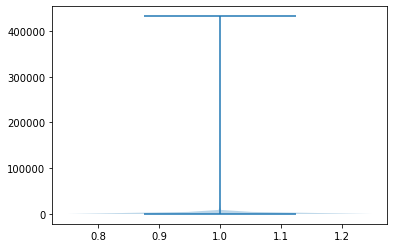

In [15]:
plt.violinplot(githubs[gh]["non_dvc_deleted_lines_per_repo"])
plt.show()

In [16]:
list(githubs[gh].keys())

['dvc_files_changes_count',
 'real_dvc_files_changes_count',
 'fake_dvc_files_changes_count',
 'dvc_added_any_type_lines_per_repo',
 'dvc_deleted_any_type_lines_per_repo',
 'dvc_added_dvc_lines_per_repo',
 'dvc_added_non_dvc_lines_per_repo',
 'dvc_deleted_dvc_lines_per_repo',
 'dvc_deleted_non_dvc_lines_per_repo',
 'non_dvc_files_changes_count',
 'non_dvc_added_lines_per_repo',
 'non_dvc_deleted_lines_per_repo']

In [173]:

df = pd.DataFrame()
for gh in githubs.keys():
    for k1,v1 in githubs[gh].items():

        temp = pd.DataFrame(data = {"value": np.array(v1)})
        temp["name"] = k1
        idx = list(githubs.keys()).index(gh)
        temp["gh"] = gh
        df = pd.concat([df, temp])

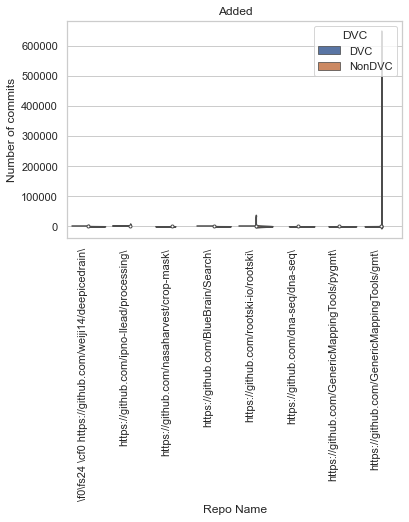

In [189]:
%matplotlib inline
df["DVC"] = df["name"].apply(lambda x: "NonDVC" if "non_dvc" in x else "DVC")
temp2 = df[(df["name"]=="non_dvc_added_lines_per_repo") | (df["name"] == "dvc_added_any_type_lines_per_repo")]

sns.violinplot(data = temp2, x = "gh", y = "value", hue = "DVC" , split=True)
plt.xlabel("Repo Name")
plt.ylabel("Number of commits")
plt.xticks(rotation = 90)
plt.title("Added")
plt.savefig("1.jpg", dpi = 300, bbox_inches='tight')
plt.show()

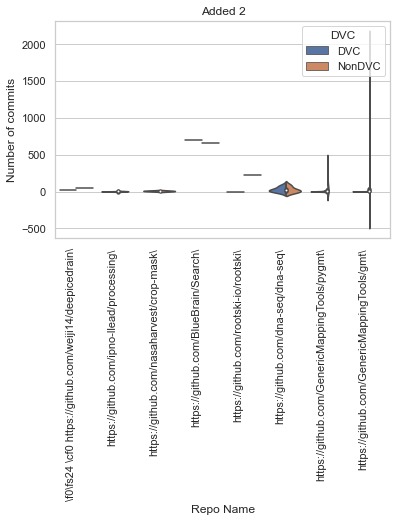

In [190]:
%matplotlib inline
df["DVC"] = df["name"].apply(lambda x: "NonDVC" if "non_dvc" in x else "DVC")
temp2 = df[(df["name"]=="dvc_added_dvc_lines_per_repo") | (df["name"] == "dvc_added_non_dvc_lines_per_repo")]

sns.violinplot(data = temp2, x = "gh", y = "value", hue = "DVC" , split=True)
plt.xlabel("Repo Name")
plt.ylabel("Number of commits")
plt.xticks(rotation = 90)
plt.title("Added 2")
plt.savefig("2.jpg", dpi = 300, bbox_inches='tight')
plt.show()

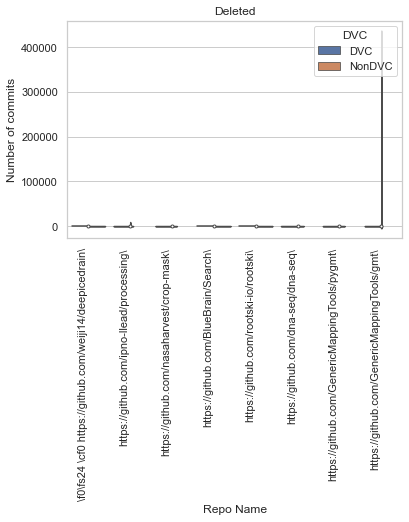

In [193]:
%matplotlib inline
df["DVC"] = df["name"].apply(lambda x: "NonDVC" if "non_dvc" in x else "DVC")
temp2 = df[(df["name"]=="dvc_deleted_any_type_lines_per_repo") | (df["name"] == "non_dvc_deleted_lines_per_repo")]

sns.violinplot(data = temp2, x = "gh", y = "value", hue = "DVC" , split=True)
plt.xlabel("Repo Name")
plt.ylabel("Number of commits")
plt.xticks(rotation = 90)
plt.title("Deleted")
plt.savefig("3.jpg", dpi = 300, bbox_inches='tight')
plt.show()

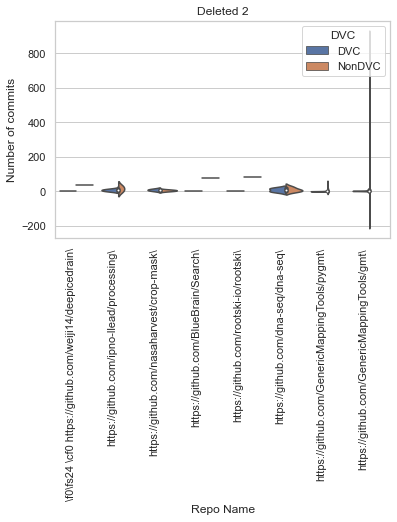

In [194]:
%matplotlib inline
df["DVC"] = df["name"].apply(lambda x: "NonDVC" if "non_dvc" in x else "DVC")
temp2 = df[(df["name"]=="dvc_deleted_dvc_lines_per_repo") | (df["name"] == "dvc_deleted_non_dvc_lines_per_repo")]

sns.violinplot(data = temp2, x = "gh", y = "value", hue = "DVC" , split=True)
plt.xlabel("Repo Name")
plt.ylabel("Number of commits")
plt.xticks(rotation = 90)
plt.title("Deleted 2")
plt.savefig("4.jpg", dpi = 300, bbox_inches='tight')
plt.show()

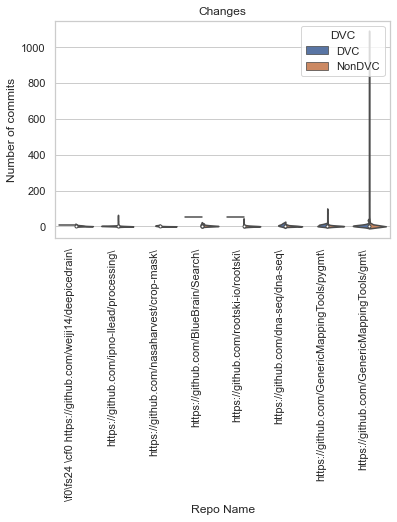

In [195]:
%matplotlib inline
df["DVC"] = df["name"].apply(lambda x: "NonDVC" if "non_dvc" in x else "DVC")
temp2 = df[(df["name"]=="dvc_files_changes_count") | (df["name"] == "non_dvc_files_changes_count")]

sns.violinplot(data = temp2, x = "gh", y = "value", hue = "DVC" , split=True)
plt.xlabel("Repo Name")
plt.ylabel("Number of commits")
plt.xticks(rotation = 90)
plt.title("Changes")
plt.savefig("5.jpg", dpi = 300, bbox_inches='tight')
plt.show()

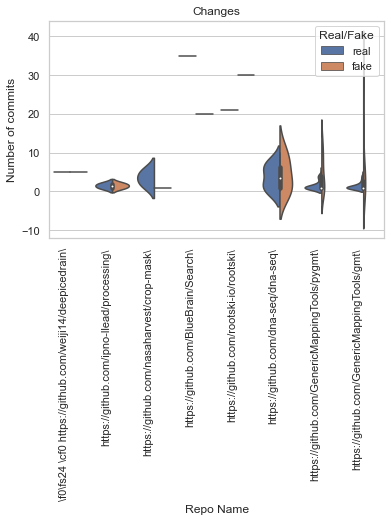

In [210]:
%matplotlib inline
df["Real/Fake"] = df["name"].apply(lambda x: "real" if "real" in x else "fake")
temp2 = df[(df["name"]=="real_dvc_files_changes_count") | (df["name"] == "fake_dvc_files_changes_count")]

sns.violinplot(data = temp2, x = "gh", y = "value", hue = "Real/Fake" , split=True)
plt.xlabel("Repo Name")
plt.ylabel("Number of commits")
plt.xticks(rotation = 90)
plt.title("Changes")
plt.savefig("6.jpg", dpi = 300, bbox_inches='tight')
plt.show()

In [192]:
list(githubs[gh].keys())

['dvc_files_changes_count',
 'real_dvc_files_changes_count',
 'fake_dvc_files_changes_count',
 'dvc_added_any_type_lines_per_repo',
 'dvc_deleted_any_type_lines_per_repo',
 'dvc_added_dvc_lines_per_repo',
 'dvc_added_non_dvc_lines_per_repo',
 'dvc_deleted_dvc_lines_per_repo',
 'dvc_deleted_non_dvc_lines_per_repo',
 'non_dvc_files_changes_count',
 'non_dvc_added_lines_per_repo',
 'non_dvc_deleted_lines_per_repo']

In [217]:
# 1
%matplotlib inline
df["DVC"] = df["name"].apply(lambda x: "NonDVC" if "non_dvc" in x else "DVC")
temp2 = df[(df["name"]=="non_dvc_added_lines_per_repo") | (df["name"] == "dvc_added_any_type_lines_per_repo")]

# temp2 = temp2[temp2["gh"] == 5]
n = 0
for gh in githubs.keys():
    temp3 = temp2[temp2["gh"] == gh]
    sns.violinplot(data = temp3, x = "gh", y = "value", hue = "DVC" , split=True)
    plt.xlabel("Repo Name")
    plt.ylabel("Number of commits")
    plt.savefig(f"1_{n}.jpg", dpi = 300)
    n = n + 1
    plt.close("all")

In [218]:
# 2
%matplotlib inline
df["DVC"] = df["name"].apply(lambda x: "NonDVC" if "non_dvc" in x else "DVC")
temp2 = df[(df["name"]=="dvc_added_dvc_lines_per_repo") | (df["name"] == "dvc_added_non_dvc_lines_per_repo")]

# temp2 = temp2[temp2["gh"] == 5]
n = 0
for gh in githubs.keys():
    temp3 = temp2[temp2["gh"] == gh]
    sns.violinplot(data = temp3, x = "gh", y = "value", hue = "DVC" , split=True)
    plt.xlabel("Repo Name")
    plt.ylabel("Number of commits")
    plt.savefig(f"2_{n}.jpg", dpi = 300)
    n = n + 1
    plt.close("all")

In [219]:
# 3
%matplotlib inline
df["DVC"] = df["name"].apply(lambda x: "NonDVC" if "non_dvc" in x else "DVC")
temp2 = df[(df["name"]=="dvc_deleted_any_type_lines_per_repo") | (df["name"] == "non_dvc_deleted_lines_per_repo")]

# temp2 = temp2[temp2["gh"] == 5]
n = 0
for gh in githubs.keys():
    temp3 = temp2[temp2["gh"] == gh]
    sns.violinplot(data = temp3, x = "gh", y = "value", hue = "DVC" , split=True)
    plt.xlabel("Repo Name")
    plt.ylabel("Number of commits")
    plt.savefig(f"3_{n}.jpg", dpi = 300)
    n = n + 1
    plt.close("all")

In [220]:
# 4
%matplotlib inline
df["DVC"] = df["name"].apply(lambda x: "NonDVC" if "non_dvc" in x else "DVC")
temp2 = df[(df["name"]=="dvc_deleted_dvc_lines_per_repo") | (df["name"] == "dvc_deleted_non_dvc_lines_per_repo")]

# temp2 = temp2[temp2["gh"] == 5]
n = 0
for gh in githubs.keys():
    temp3 = temp2[temp2["gh"] == gh]
    sns.violinplot(data = temp3, x = "gh", y = "value", hue = "DVC" , split=True)
    plt.xlabel("Repo Name")
    plt.ylabel("Number of commits")
    plt.savefig(f"4_{n}.jpg", dpi = 300)
    n = n + 1
    plt.close("all")

In [221]:
# 5
%matplotlib inline
df["DVC"] = df["name"].apply(lambda x: "NonDVC" if "non_dvc" in x else "DVC")
temp2 = df[(df["name"]=="dvc_files_changes_count") | (df["name"] == "non_dvc_files_changes_count")]

# temp2 = temp2[temp2["gh"] == 5]
n = 0
for gh in githubs.keys():
    temp3 = temp2[temp2["gh"] == gh]
    sns.violinplot(data = temp3, x = "gh", y = "value", hue = "DVC" , split=True)
    plt.xlabel("Repo Name")
    plt.ylabel("Number of commits")
    plt.savefig(f"5_{n}.jpg", dpi = 300)
    n = n + 1
    plt.close("all")

In [222]:
# 6
%matplotlib inline
df["Real/Fake"] = df["name"].apply(lambda x: "real" if "real" in x else "fake")
temp2 = df[(df["name"]=="real_dvc_files_changes_count") | (df["name"] == "fake_dvc_files_changes_count")]

# temp2 = temp2[temp2["gh"] == 5]
n = 0
for gh in githubs.keys():
    temp3 = temp2[temp2["gh"] == gh]
    sns.violinplot(data = temp3, x = "gh", y = "value", hue = "Real/Fake" , split=True)
    plt.xlabel("Repo Name")
    plt.ylabel("Number of commits")
    plt.savefig(f"6_{n}.jpg", dpi = 300)
    n = n + 1
    plt.close("all")